<a href="https://colab.research.google.com/github/aetknaapen/assignments/blob/master/Python_assignment_draft4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Python Assignment Applied Economic Analysis 1

**Annemarie van Oijen (213579) & Anne Knaapen (255349)**


##Abstract

In this assignment, we examine whether the requirements of the climate accord of Paris will be reached in the European Union with regard to CO2 emissions. First, we discuss the research question and the corresponding motivation. Second, we outline the dataset, and look at the development of CO2 emission levels, both on worldwide and EU level. We find that, on EU level, CO2 emissions have already been decreasing in the last decades. Next, we make both a naive and an ARIMA prediction about the future development of the EU CO2 emission levels. With ARIMA, we find that the target for the CO2 emission level will be reached. 

##Content



*   [Research question](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=r5UjBz4gJqi0)
*   [Motivation](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=6MliNdsULqPe)
* [Results](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=e97jtheoL-Fp)
* [Conclusion](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=GGlA_Tj6NXdx)
* [Discussion](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=4Op9jggvNbrN)





##Research question

The research question is: Will the requirements of the climate accord of Paris be reached in the European Union with regard to CO2 emissions?

##Motivation

The last decades, the interest in and evidence of climate change has grown rapidly. All over the world, countries are taking action to reach a more green society with less polution. The Paris Agreement that was signed in 2015 was a big step towards a worldwide decrease of polution, a lower level of emissions, especially focussed towards CO2. Within this agreement of the  [United Nations](https://unfccc.int/process-and-meetings/the-paris-agreement/the-paris-agreement), countries set their own goals for reducing emissions. The [European Union's nationally determined contribution](https://ec.europa.eu/clima/policies/international/negotiations/paris_en) was to reduce greenhouse gas emissions by at least 40 percent in 2030, compared to 1990. As shown by the data, the CO2 emissions in the European Union are already decreasing. However, a 40 percent decrease compared to 1990 is not yet reached. In this paper, we will find whether and if this will be reached by forecasting the CO2 emission based on past data.


##Results

**Answer**
The answer to the [research question](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=r5UjBz4gJqi0) is: Yes, the requirements of the climate accord will be reached in 2030 when looking at the EU level.

**Prepare data**

First, we have to import the [Worldbank dataset](https://data.worldbank.org/) and search a  right indicator for the level of CO2 emission.

In [40]:
!pip install wbdata

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wbdata as wb


In [42]:
wb.search_indicators("CO2 emission")

EN.CO2.TRAN.ZS      	CO2 emissions from transport (% of total fuel combustion)
EN.CO2.TRAN.MT      	CO2 emissions from transport (million metric tons)
EN.CO2.OTHX.ZS      	CO2 emissions from other sectors, excluding residential buildings and commercial and public services (% of total fuel combustion)
EN.CO2.OTHX.MT      	CO2 emissions from other sectors, excluding residential buildings and commercial and public services (million metric tons)
EN.CO2.MANF.ZS      	CO2 emissions from manufacturing industries and construction (% of total fuel combustion)
EN.CO2.MANF.MT      	CO2 emissions from manufacturing industries and construction (million metric tons)
EN.CO2.ETOT.ZS      	CO2 emissions from electricity and heat production, total (% of total fuel combustion)
EN.CO2.ETOT.MT      	CO2 emissions from electricity and heat production, total (million metric tons)
EN.CO2.BLDG.ZS      	CO2 emissions from residential buildings and commercial and public services (% of total fuel combustion)
EN.C

Above, all the possible indicators for CO2 emission are stated. We choose the variabele for CO2 emission in kilo ton because the climate accord requirements are stated in this way.

**Descriptive statistics**

We now take a look at what the dataset looks like. We rename the indicator EN.ATM.CO2E.KT  into CO2 emission. Next, the first 10 and last 10 rows of the dataset are shown, to get an idea what the data looks like. 

In [43]:
indicators = {"EN.ATM.CO2E.KT":"CO2_emission"}
df_wb = wb.get_dataframe(indicators, convert_date=True)
df_wb.reset_index(inplace = True)
df_wb.head(10)

,country,date,CO2_emission
0,Arab World,2018-01-01,NaN
1,Arab World,2017-01-01,NaN
2,Arab World,2016-01-01,NaN
3,Arab World,2015-01-01,NaN
4,Arab World,2014-01-01,1.895700e+06
5,Arab World,2013-01-01,1.775096e+06
6,Arab World,2012-01-01,1.796962e+06
7,Arab World,2011-01-01,1.655808e+06
8,Arab World,2010-01-01,1.645559e+06
9,Arab World,2009-01-01,1.581328e+06


In [44]:
df_wb.tail(10)

,country,date,CO2_emission
15566,Zimbabwe,1969-01-01,6750.947
15567,Zimbabwe,1968-01-01,6384.247
15568,Zimbabwe,1967-01-01,5298.815
15569,Zimbabwe,1966-01-01,6046.883
15570,Zimbabwe,1965-01-01,5214.474
15571,Zimbabwe,1964-01-01,4473.740
15572,Zimbabwe,1963-01-01,NaN
15573,Zimbabwe,1962-01-01,NaN
15574,Zimbabwe,1961-01-01,NaN
15575,Zimbabwe,1960-01-01,NaN


By looking at this overview, we can see that the dataset exists of data of all countries in the period 1960-2017. However, the dataset also includes empty cells (NaN).

**CO2 emission over time**

To see if and how CO2 emissions vary over time, we compare the dataset of 1990 with the one of 2014. This data is choosen because by looking more closely into the [dataset](https://databank.worldbank.org/data/reports.aspx?source=2&series=EN.ATM.CO2E.KT&country=) of the Worldbank, many data is availabe for this period. We merge the datasets based on 'inner', which means only countries with data for both periods are included in the new, merged dataset. We start by looking at the complete dataset, so all countries and country groups as stated by the Worldbank.

In [0]:
df_1990=df_wb[df_wb['date']=='1990-01-01']
df_2014=df_wb[df_wb['date']=='2014-01-01']

In [0]:
df_merged = pd.merge(df_1990, df_2014, on=['country'], suffixes=['_1990', '_2014'], how='inner')

We again take a look at the first 10 rows to see what the dataset looks like.

In [47]:
df_merged.head(10)

,country,date_1990,CO2_emission_1990,date_2014,CO2_emission_2014
0,Arab World,1990-01-01,6.717361e+05,2014-01-01,1.895700e+06
1,Caribbean small states,1990-01-01,3.159487e+04,2014-01-01,6.363712e+04
2,Central Europe and the Baltics,1990-01-01,9.983024e+05,2014-01-01,6.363858e+05
3,Early-demographic dividend,1990-01-01,2.851175e+06,2014-01-01,7.079255e+06
4,East Asia & Pacific,1990-01-01,4.703785e+06,2014-01-01,1.427211e+07
5,East Asia & Pacific (excluding high income),1990-01-01,2.864275e+06,2014-01-01,1.168863e+07
6,East Asia & Pacific (IDA & IBRD countries),1990-01-01,2.822276e+06,2014-01-01,1.164808e+07
7,Euro area,1990-01-01,NaN,2014-01-01,2.191542e+06
8,Europe & Central Asia,1990-01-01,NaN,2014-01-01,6.245992e+06
9,Europe & Central Asia (excluding high income),1990-01-01,NaN,2014-01-01,3.029861e+06


We describe the total dataset of both 1990 and 2014, to compare the averages of CO2 emission of these years. 

In [48]:
df_merged.describe()

,CO2_emission_1990,CO2_emission_2014
count,2.150000e+02,2.510000e+02
mean,7.295739e+05,1.273374e+06
std,2.476163e+06,4.224365e+06
min,7.334000e+00,1.100100e+01
25%,8.599115e+02,2.458724e+03
50%,1.000358e+04,2.223302e+04
75%,1.477123e+05,2.455680e+05
max,2.214940e+07,3.613828e+07


If we compare the mean of the CO2 emission of 1990 and 2014, we see that in 2014, the global average level of CO2 emissions is higher. Next, we show this graphically.

Text(0,0.5,'CO2 emission in 2014')

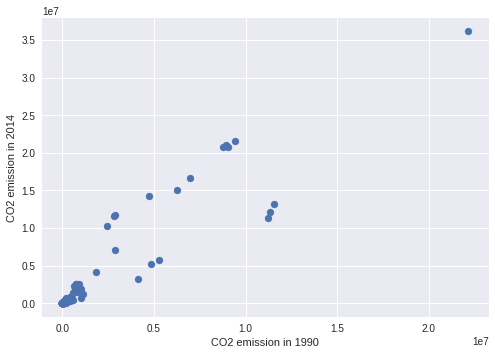

In [49]:
plt.scatter(df_merged['CO2_emission_1990'],df_merged['CO2_emission_2014'])
plt.xlabel('CO2 emission in 1990')
plt.ylabel('CO2 emission in 2014')

Next, we make this graph interactive, to show which point belongs to which country. It is important to remember that becaused we merged the dataset based on 'inner', only countries that have data in both periods are included. 

In [50]:
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import HoverTool
output_notebook()

hover = HoverTool(tooltips=[
     ('country','@country'),
     ])

plot = figure(tools=[hover])
plot.circle('CO2_emission_1990','CO2_emission_2014',
    size=10, source=df_merged)
output_file('inequality.html')
show(plot)

Loading BokehJS ...

We showed that for the dataset as a whole, CO2 emissions rise over time. The quantities have to be interpreted with care, for example in the upper right corner, there is a dot whith enormous CO2 emission. However, this is the CO2 emission level for the world as a total. This has to do with the way the dataset of the Worldbank is build, it consists of both countries and groups of countries. Furthermore, the data creates income classes, namely low income, lower middle income, upper middle income and high income.

To be able to make a prediction with regard to the climate accord, and to solve for the earlier mentioned difficulties with the dataset, we now isolate the variable for the European Union. To meet our [research question](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=O6MUvjIMJqGR), we must check whether the emission level of 2030 will be 40 percent lower as compared to 1990. 
First, we start with selecting the data for the European Union and display the first and last 10 rows. 

In [0]:
indicators={"EN.ATM.CO2E.KT":"CO2_emission"}
countries=["EUU"]
df_wb_1=wb.get_dataframe(indicators, country=countries, convert_date=True)

In [52]:
df_wb_1.head(10)

,CO2_emission
date,
2018-01-01,NaN
2017-01-01,NaN
2016-01-01,NaN
2015-01-01,NaN
2014-01-01,3241844.353
2013-01-01,3421472.348
2012-01-01,3494155.955
2011-01-01,3568090.009
2010-01-01,3709775.555


In [53]:
df_wb_1.tail(10)

,CO2_emission
date,
1969-01-01,3.520601e+06
1968-01-01,3.317199e+06
1967-01-01,3.135495e+06
1966-01-01,3.066068e+06
1965-01-01,2.977006e+06
1964-01-01,2.879590e+06
1963-01-01,2.763661e+06
1962-01-01,2.587256e+06
1961-01-01,2.445946e+06


Text(0.5,0,'year')

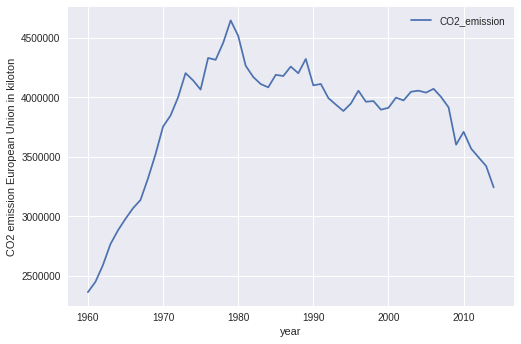

In [54]:
df_wb_1.plot()
plt.ylabel('CO2 emission European Union in kiloton')
plt.xlabel('year')

By looking at this graph, in contrast to the worldwide data, the CO2 emission level at the EU level is already falling. The decrease in CO2 emissions in the EU over the last decades can be explained by the fact that the Europe is a relatively high developed continent, compared to other continents like Africa or Asia. As a high developed continent, Europe has a large service sector and a small industrial sector. In contrast, developing continents like Asia still have a large industrial sector, which might explain why CO2 emission levels are higher. Furthermore, the graph shows a sharp decline of emissions at the start of the economic crisis in 2007. Because of the economic crisis, [industrial activity slowed down](https://ec.europa.eu/eurostat/statistics-explained/pdfscache/1180.pdf). Consequently, CO2 emissions were reduced. Now we are going to predict whether the target will be reached. 

**Prediction**

We are going the predict the EU wide level of CO2 emission. We start we a naive prediction inspired by an [example](https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/) about predicting the level of sales of champagne.

In [0]:
import scipy as sc
import sklearn as sk
import statsmodels as st

The dataset needs to be adapted, it consists of empty cells for the period 2015-2017. This is solved by dropping the first three rows of the dataset.

In [0]:
df_wb_1.drop(df_wb_1.index[:3], inplace=True)

In [57]:
df_wb_1.head(10)

,CO2_emission
date,
2015-01-01,NaN
2014-01-01,3241844.353
2013-01-01,3421472.348
2012-01-01,3494155.955
2011-01-01,3568090.009
2010-01-01,3709775.555
2009-01-01,3601566.052
2008-01-01,3915303.571
2007-01-01,4003410.580


*Naive prediction*

Next, we start with preparing the dataset for the naive forecast. The naive forecast is a baseline prediction with which more elaborate predictions are compared with. This naive way of predicting uses the data of the previous period for the prediction for the next period, and predicts the average outcome to get a naive of baseline forecast.


Next, we run the naive model, with both a train and a test set, who both consists of half of the data. This code displays both the predicted value by the model and the expected value, so the real values in the test dataset. We also calculate the RMSE (root-mean-square deviation), to see how well the model fits.

In [58]:
from sklearn.metrics import mean_squared_error
from math import sqrt

X = df_wb_1.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

history = [x for x in train]
predictions = list()
for i in range(len(test)):
	
	yhat = history[-1]
	predictions.append(yhat)
	
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=4202996.500, Expected=4258990
>Predicted=4258990.000, Expected=4179574
>Predicted=4179574.000, Expected=4189512
>Predicted=4189511.500, Expected=4084429
>Predicted=4084428.750, Expected=4111986
>Predicted=4111986.250, Expected=4171917
>Predicted=4171917.000, Expected=4266013
>Predicted=4266013.000, Expected=4518359
>Predicted=4518359.000, Expected=4647644
>Predicted=4647644.000, Expected=4457561
>Predicted=4457561.000, Expected=4315908
>Predicted=4315908.000, Expected=4331570
>Predicted=4331569.500, Expected=4065318
>Predicted=4065317.500, Expected=4142868
>Predicted=4142868.500, Expected=4203896
>Predicted=4203895.500, Expected=3999496
>Predicted=3999496.000, Expected=3846742
>Predicted=3846742.000, Expected=3753441
>Predicted=3753440.750, Expected=3520601
>Predicted=3520600.750, Expected=3317199
>Predicted=3317198.750, Expected=3135495
>Predicted=3135494.750, Expected=3066068
>Predicted=3066068.250, Expected=2977006
>Predicted=2977005.750, Expected=2879590
>Predicted=28795

The RMSE is about 139885. This means for each prediction, the model is 139885 kiloton CO2 emission wrong. 

*Optimal ARIMA model*

Next, we use the [ARIMA model](https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3). The ARIMA (AutoRegressive Integrated Moving Average) model is one of the most used model in time series forecasting. 




We start with preparing the data for the model. The data is divided in both a dataset and a validation set. The validation set is used for checking how well the model performs, after building it with making use of the dataset. We choose to use the period 1960-1999 for the dataset, and 2000-2014 for the validation set. 

In [59]:
split_point = len(df_wb_1) - 15
dataset, validation = df_wb_1[0:split_point], df_wb_1[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 41, Validation 15


The division went well, 40 observations are included in the dataset, and 15 in the validation set which makes 55 observations in total.

Making use of the following [example](https://machinelearningmastery.com/time-series-forecast-study-python-annual-water-usage-baltimore/), we are going to search for the optimal ARIMA parameters for our model. The code evaluates ARIMA models with different parameters and looks for the optimal combination of parameters by making use of our observations. The values of the parameters have to be in a certain range. P has to be between 0 and 5, d between 0 and 3, and q between 0 and 5. 

In [60]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def evaluate_arima_model(X, arima_order):
	
	X = df_wb_1.astype('float32')
	train_size = int(len(X) * 0.50)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		
		model_fit = model.fit(trend='nc', disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])

	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse

def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
p_values = range(0, 5)
d_values = range(0, 3)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(df_wb_1.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


Unfortunately, we do not find an optimal model is this way, so we figure it out manually. First, for ARIMA, stationary data is assumed. However, in general time series data is often non-stationary, which means there is a trend or seasonality. We perform an Augmented Dickey Fuller test to see whether our dataset is stationary. The null hypothesis of this test is that the dataset is non-stationary. Before we perform the test, we have to drop the cells empty cells. 

In [61]:
from statsmodels.tsa.stattools import adfuller
df_wb_1.dropna(inplace=True)

X = df_wb_1['CO2_emission'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.095357
p-value: 0.995177
Critical Values:
	5%: -2.917
	1%: -3.558
	10%: -2.596


By looking at the p-value of this test, we cannot reject the null hypothesis, and it is likely that our dataset is non-stationary. We therefore choose the first parameter in our ARIMA model (the p) as a 1. We do not choose a higher number because although our dataset is non-stationary, it is not likely that seasonality is present because we work with annual data. 

For the other parameters of the ARIMA model, we use two graphs, one for autocorrelation and one for partial autocorrelation. 

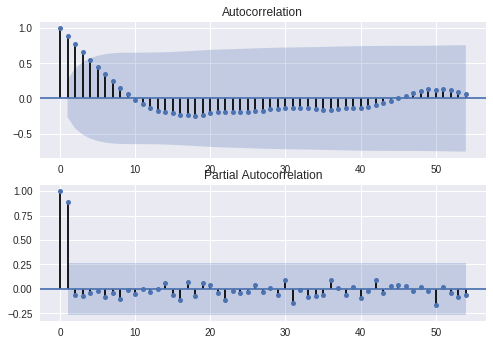

In [62]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure()
pyplot.subplot(211)
plot_acf(df_wb_1, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(df_wb_1, ax=pyplot.gca())
pyplot.show()

If we compare these graphs to [this example](https://machinelearningmastery.com/time-series-forecast-study-python-annual-water-usage-baltimore/), we assume that we need to correct for autocorrelation, when looking at the first graph. The second graph can be used as a way to see whether there is seasonality. In this case, the data is yearly, and seasonality would not be an issue. So, the resulting ARIMA model might have the parameters (1,1,0).

Additional to the ARIMA model, we add for the model trend=nc, this means that trend is not constant, which we expect from our graph. 
However, simply running the ARIMA model like the next code is not enough. We have to correct for a bias, like in the previous mentioned [example](https://machinelearningmastery.com/time-series-forecast-study-python-annual-water-usage-baltimore/). This bias is calculated as the mean of the residuals. The residuals are the difference between the observed values and the estimated values. 

Starting from this point, some codes included a part for ignoring several warnings, they are irrelevant for this research. 

In [63]:
from pandas import DataFrame
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

X = df_wb_1.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

history = [x for x in train]
predictions = list()
for i in range(len(test)):

	model = ARIMA(history, order=(1,1,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	predictions.append(yhat)

	obs = test[i]
	history.append(obs)

residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())

                   0
count      28.000000
mean   -55680.228195
std    123274.267497
min   -267147.470520
25%   -148860.867479
50%    -76258.964200
75%     30327.246300
max    261212.428277


The mean of the residuals is about -55680, so we take this value as the bias of our model.

The following code is one way of running the model, including the calculated bias (so the mean of the residuals). However, for saving the model, there is a bug, so we have to create a path around it, which is the first part of the code. The rest is the creation of the ARIMA model with the parameters (1,1,0) and our dataset. The created model will be saved.

In [0]:
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats import boxcox
import numpy

warnings.filterwarnings("ignore")

def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
 
ARIMA.__getnewargs__ = __getnewargs__

X = df_wb_1.values
X = X.astype('float32')

model = ARIMA(X, order=(1,1,0))
model_fit = model.fit(trend='nc', disp=0)

bias = -55680

model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

An example of what we are able to do now is to load our model and to predict one period in the future, based on a prediction and the bias. 

In [65]:
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima_model import ARIMAResults

model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = bias + float(model_fit.forecast()[0])
print('Predicted: %.3f' % yhat)


Predicted: 2278999.538


However, it is not finished yet, the model needs to be validated using the dataset and the validationset, which were seperated earlier. We include this data and load our created model. However, we start with transforming our data in a dataframe. Next, predictions are created which can be compared to the expected values, as long as the number of predictions is between one and the length of the validation set, 15 . We also calculate the RMSE.

>Predicted=2278999.538, Expected=4142868
>Predicted=4260634.509, Expected=4203896
>Predicted=4151156.709, Expected=3999496
>Predicted=3934596.764, Expected=3846742
>Predicted=3783084.680, Expected=3753441
>Predicted=3692593.857, Expected=3520601
>Predicted=3450835.816, Expected=3317199
>Predicted=3247083.943, Expected=3135495
>Predicted=3065463.945, Expected=3066068
>Predicted=3004741.505, Expected=2977006
>Predicted=2913960.048, Expected=2879590
>Predicted=2815670.410, Expected=2763661
>Predicted=2697890.689, Expected=2587256
>Predicted=2515431.752, Expected=2445946
>Predicted=2376613.583, Expected=2359595
RMSE: 489266.900


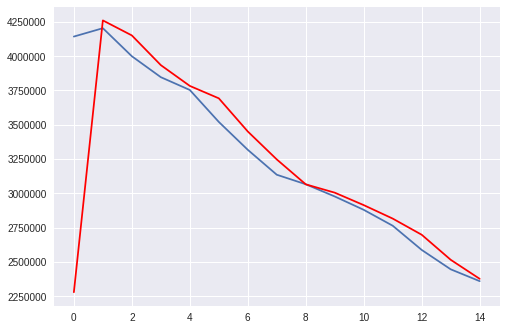

In [66]:
from statsmodels.tsa.arima_model import ARIMAResults
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from math import sqrt

def difference(dataset):
        diff = list()
        for i in range(1, len(dataset)):
                value = dataset[i] - dataset[i - 1]
                diff.append(value)
        return diff


X = df_wb_1.values
X = X.astype('float32')

stationary = difference(X)

df_X = pd.DataFrame({'year': df_wb_1.index.values, 'X':X.flatten()})

validation = df_wb_1.from_csv('validation.csv')


def difference(validation):
        diff = list()
        for i in range(1, len(validation)):
                value = validation[i] - validation[i - 1]
                diff.append(value)
        return diff

y = validation.values
y = y.astype('float32')
      
stationary = difference(y)

df_y = pd.DataFrame({'year': validation.index.values, 'y':y.flatten()})

history = [x for x in X]

model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')

predictions = list()
yhat = bias + float(model_fit.forecast()[0])
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))

for i in range(1, len(y)):
  model = ARIMA(history, order=(1,1,0))
  model_fit = model.fit(trend='nc', disp=0)
  yhat = bias + float(model_fit.forecast()[0])
  predictions.append(yhat)
	
  obs=y[i]
  history.append(obs)
  print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))

mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
pyplot.plot(y)
pyplot.plot(predictions, color='red')
pyplot.show()


The lines of the graph follow the same trend so the fit of our model looks quite nice. However, a remark must be made. The RMSE of about 489267 is higher compared to the naive forecast. 

*Out of sample forecast*

Now we have found our model, we are going to predict the CO2 emission level of 2030. We load our created model and do a forecast with 16 steps, from the last year of our dataset (2014) until 2030.

In [67]:
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
forecast = model_fit.forecast(steps=16)[0]
print (forecast)


[2334679.53800977 2327490.48352922 2325416.16901943 2324817.65071676
 2324644.955517   2324595.12641088 2324580.74882644 2324576.60034876
 2324575.40335583 2324575.05797803 2324574.95832345 2324574.92956933
 2324574.92127268 2324574.91887878 2324574.91818805 2324574.91798875]


According to the predictions of our model, the level of CO2 emission in 2030 will be about 2324575 kiloton. 

In [68]:
df_wb_1['1990-01-01'].describe

<bound method DataFrame.describe of             CO2_emission
date                    
1990-01-01  4.100787e+06>

The level of CO2 emission in 1990 is about 4100787. In order to reach the climate accord, the level of 2030 has to be 40 percent lower, so the target level is approsimately 2460472. This would imply that the goal set in the Paris agreement would be reached in 2030. 


##Conclusion

Using the ARIMA model, we find that the Paris agreement requirements regarding the reduction of CO2 emissions in the EU will be reached in 2030. We found that CO2 emissions are already declining in the period 1990-2014, but a further forecasted decline in the period 2014-2030 meets the CO2 requirements for 2030. So, the answer to the [research question](https://colab.research.google.com/drive/133wjBNYuZQkdMoPheY4JGEmMivVX3ktp#scrollTo=O6MUvjIMJqGR) is: Yes, the requirements will be reached.

##Discussion

To be able to better estimate the future emissions of CO2, it would be easier to have more data (for example on a monthly basis instead of a yearly basis). Monthly data would have to be adjusted for seasonality, as it would be logical to have higher CO2 emissions in winter than in the summer. Other [examples](https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3) also show that monthly data on CO2 emissions show seasonality. 


When we look for the optimal ARIMA model, we do not find any optimal model. The model we used is based on our own assumptions which can always be questioned. As we showed, the dataset is non-stationary. A possible explanation why we cannot find an optimal model can be that another model instead of an ARIMA model would be better to use. Another option could be to transform the dataset into a stationary dataset, instead of only correcting the parameters of the model for this. A way to transform the dataset would be to use a logaritm. So, we admit that next to our prediction, other way of prediction are possible and might even be better. This also turns out when we look at the RMSE of our model, which is relatively high. 